ПИН-б-з-19-1, Диденко Мария


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.datasets import fetch_openml

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None


    def fit(self, X):

        self.mean = np.mean(X, axis=0)


        cov_matrix = np.cov(X - self.mean, rowvar = False)

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        idx = eigenvalues.argsort()[::-1]


        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]

        return self


    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean

    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot

    def plot_eigvalues(self, figsize=(15,7)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'.',
                 label='Все собственные значения',
                 linewidth = 3)
        plt.plot(self.values[:self.n_components],'r-o',
                 label='Собственное Пространство',
                 markersize = 10, mfc='none',
                 linewidth = 2, alpha = 0.8)
        plt.ylabel('собственные\n значения', fontsize=25)
        plt.grid();
        plt.legend(fontsize=25);
        plt.xticks(FontSize = 25); plt.yticks(FontSize = 25);
        plt.tight_layout();

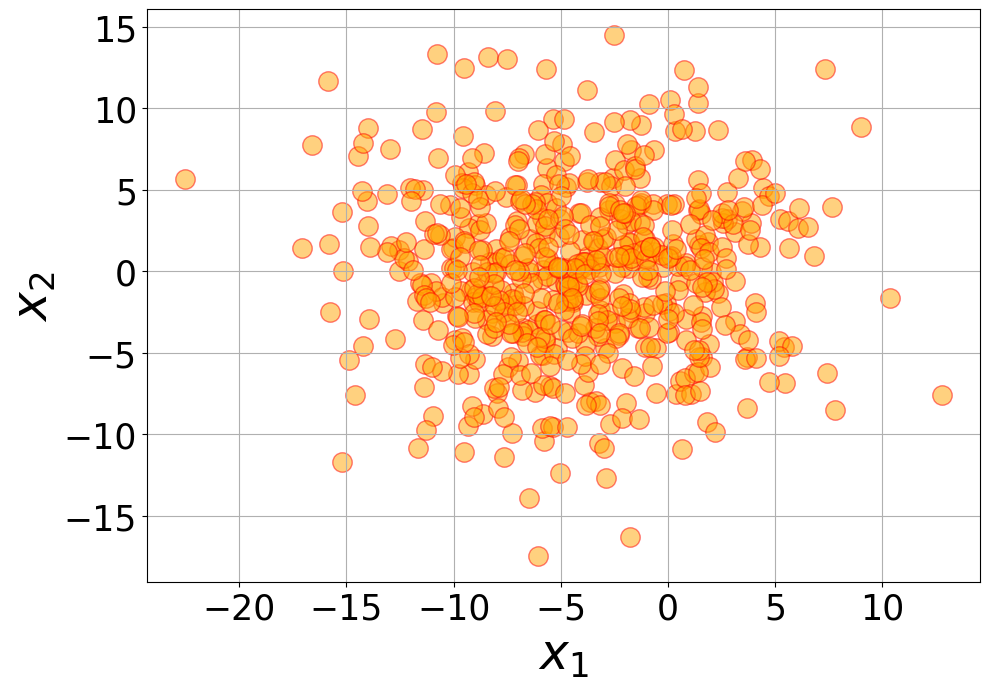

In [ ]:
#@title **Параметры распределения данных** { run: "auto" }
#@markdown ### Координаты Центра
C1 =  -4.2 #@param {type:"slider", min:-5, max:5, step:0.1}
C2 =  0 #@param {type:"slider", min:-5, max:5, step:0.1}
#@markdown ### "Мощность" направлений
S1 =  5 #@param {type:"slider", min:0, max:5, step:0.1}
S2 =  5 #@param {type:"slider", min:0, max:5, step:0.1}
#@markdown ### Угол наклона
theta = 9.1 #@param {type:"slider", min:0.1, max:12, step:0.1}
#@markdown ### Количество точек
N = 600 #@param {type:"slider", min:100, max:2000, step:100}

theta = np.pi/theta
Centers = np.array([C1,C2])
Sigmas = np.array([S1,S2])


R = np.array([[np.cos(theta), - np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

X = R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))

fig = plt.figure(figsize=(10,7))
plt.grid()

plt.scatter(X[0,:],X[1:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25);
plt.tight_layout();

In [ ]:
def create_elipsoid_data(C1 = 0,C2 = 0 ,S1 = 5,S2 =1, theta =45, N = 250, random_state = 42):
    np.random.seed(random_state)

    theta = np.pi*theta/180
    Centers = np.array([C1,C2])
    Sigmas = np.array([S1,S2])

    R = np.array([[np.cos(theta), - np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])

    return (R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))).T


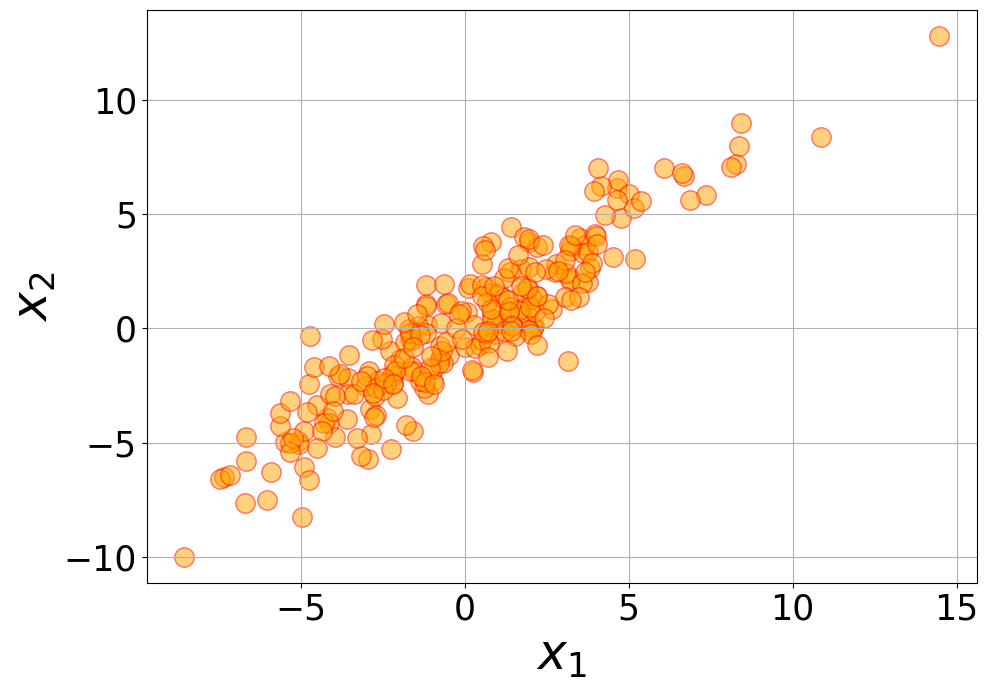

In [ ]:
X =create_elipsoid_data()


fig  = plt.figure(figsize=(10,7))
plt.scatter(X[:, 0],X[:, 1],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r');
plt.grid()

plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25);
plt.tight_layout();

In [ ]:
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)
X = X / 255.
X_ = X.values

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


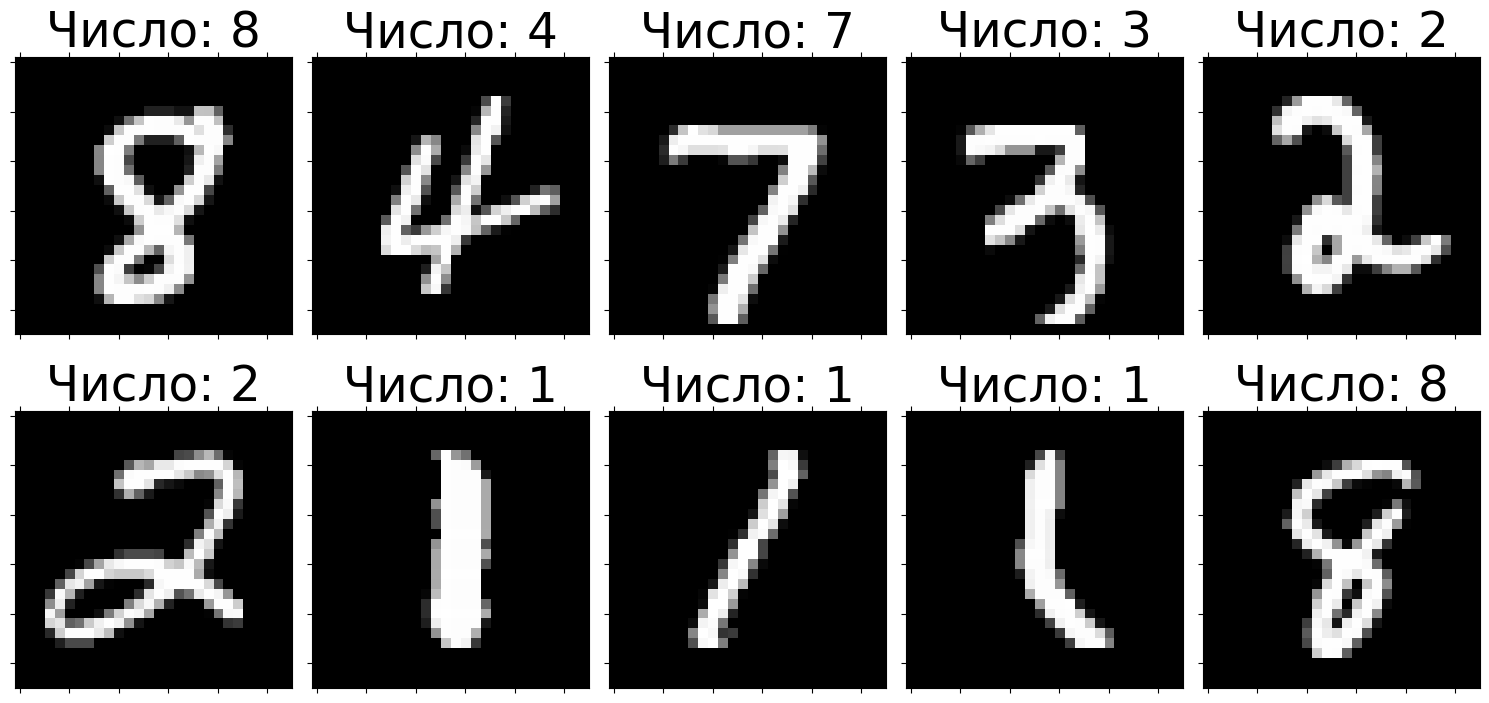

In [ ]:
#@title Разные примеры { run: "auto" }
n =  15258 #@param {type:"slider", min:1, max:69984, step:1}

fig = plt.figure( figsize=(15,8) )
for i in range(0,10):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
  ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
             cmap='Greys')
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
  plt.tight_layout()

In [ ]:
pca = PCA(n_components = 100)
pca.fit(X_)
pca.score(X_)

0.9398662110143557

In [ ]:
pca_result_mnist = pca.transform(X_)

In [ ]:
pca_inverse = pca.inverse_transform(pca_result_mnist)

In [ ]:
pca_inverse.shape

(70000, 784)

AttributeError: ignored

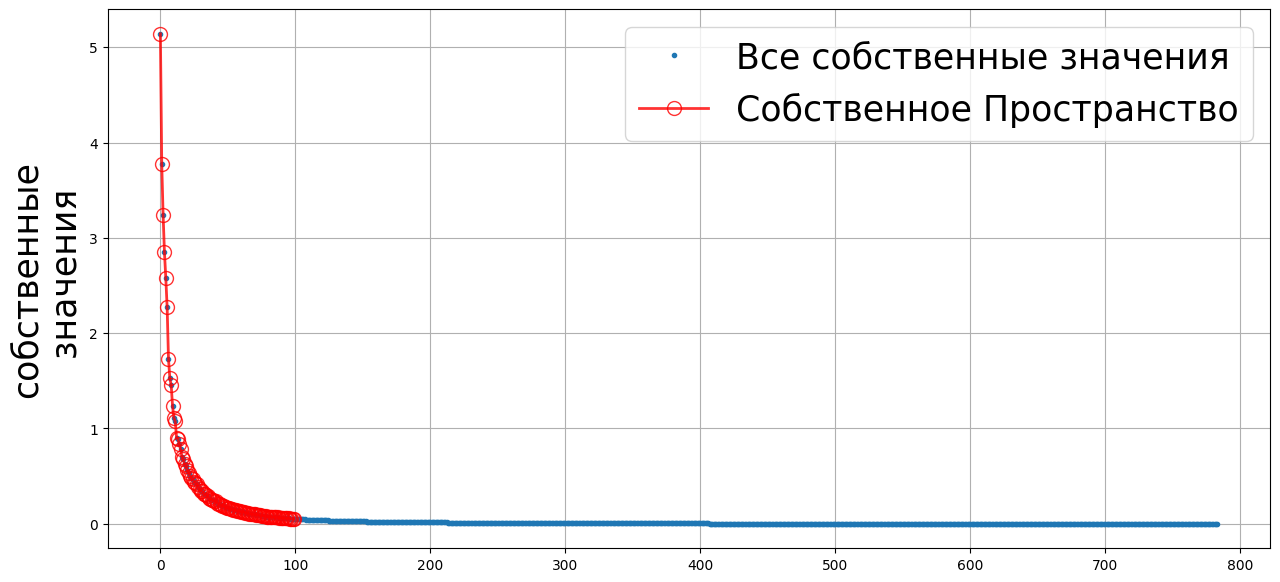

In [ ]:
pca.plot_eigvalues();

In [ ]:
def plot_multi(data, y,  names):
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]


    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y, s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        ax.set_xlim([-10,12])
        ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Цифры",
                        fontsize = 15)
        ax.add_artist(legend1)

In [ ]:
pca_names = [str(x+1)+' Главная Компонента' for x in range(4)]

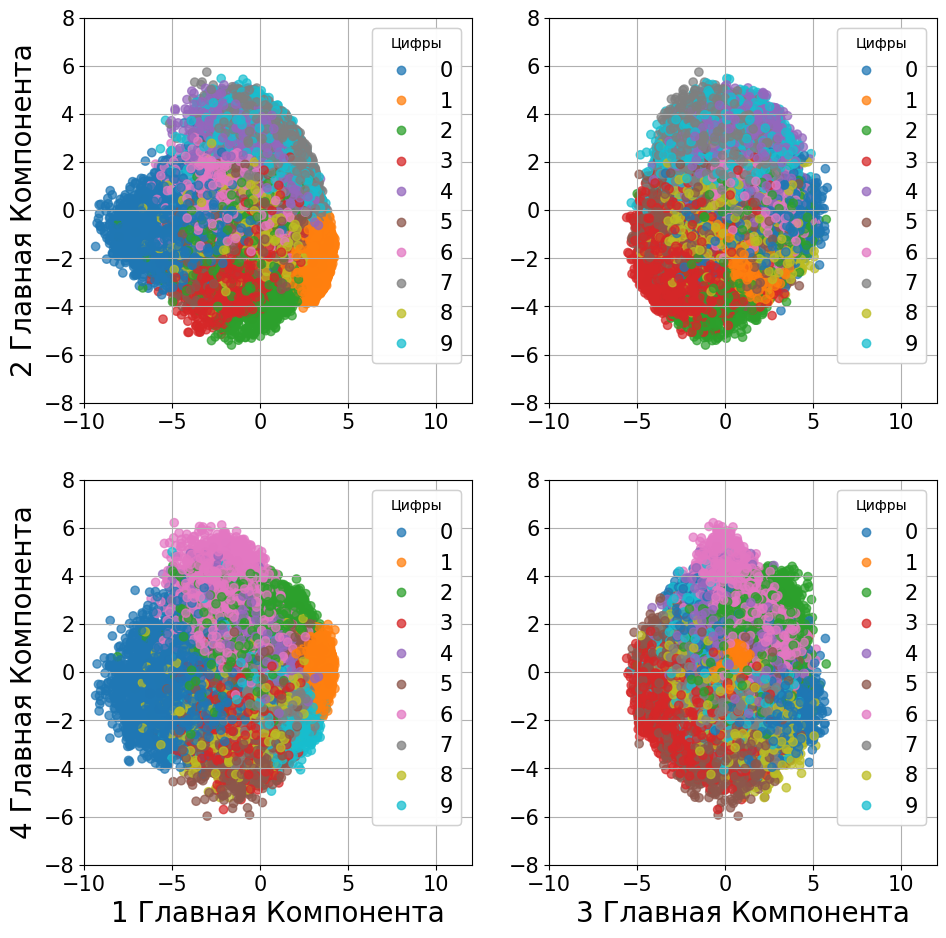

In [ ]:
plot_multi(pca_result_mnist, y.astype(int), pca_names);

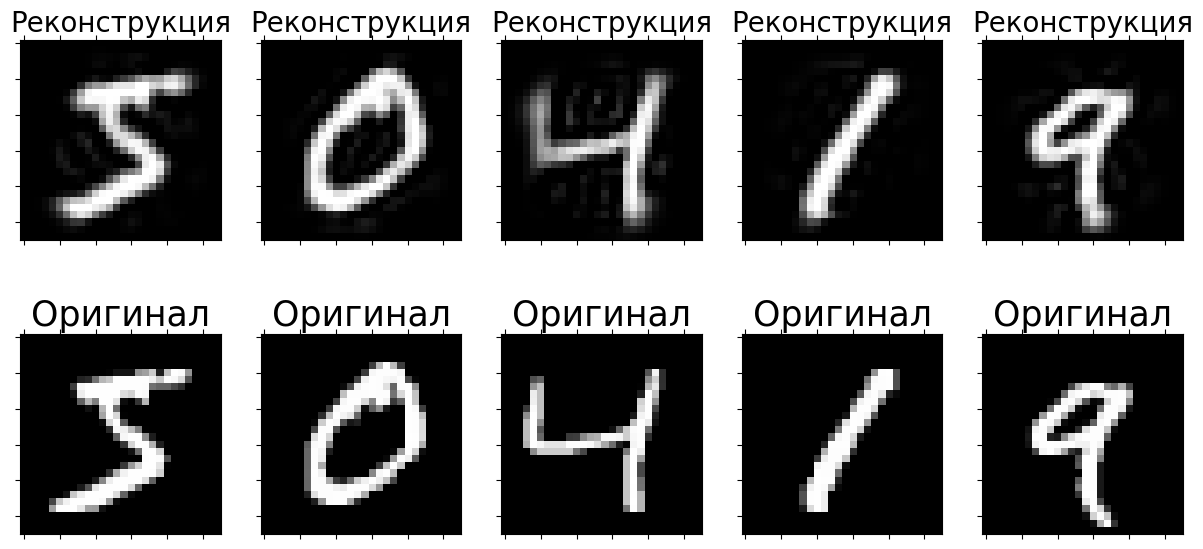

In [ ]:
fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)
  ax.matshow(1-pca_inverse[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)
  ax.matshow(1-X_[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

plt.savefig('Рис5_6.png', dpi = 300,bbox_inches='tight');

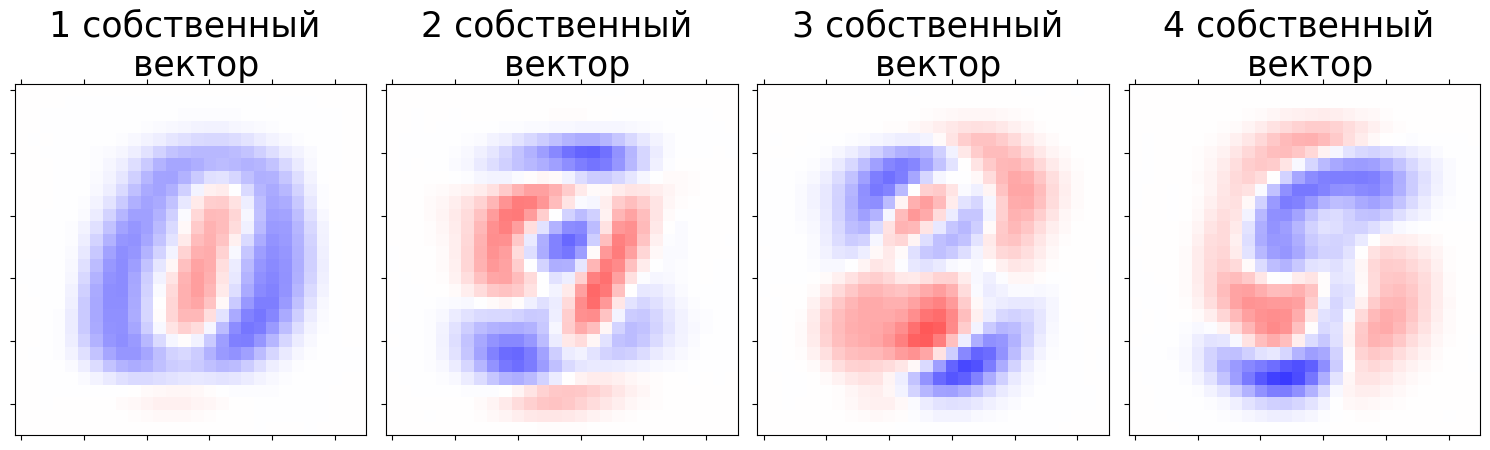

In [ ]:
W_pca=pca.components.T
fig=plt.figure(figsize=(15,5))
for i in range(0,4):
  ax = fig.add_subplot(1,4,i+1,title=str(i+1) )
  ax.set_title("{} собственный \n вектор".format(str(i+1)), size=25)
  ax.matshow(W_pca[i].reshape((28,28)).astype(float), cmap = 'bwr', vmin=-0.20,vmax = 0.20)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout();

In [ ]:
pca.components


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])